# 1 - Problem Statement

Solve the mean-field $\alpha-\Omega$ dynamo equations in the kinematic regime. That is, include the $\Omega$ effect term in the equation for $\dfrac{\partial \bar{B}_\phi}{\partial t}$ and the $\alpha$ effect term in the equation for $\dfrac{\partial \bar{B}_r}{\partial t}$. This requires specifying the overall magnitude and spatial dependence of $\Omega$ and $\alpha$.
* Repeat the investigation you had done for task 1, with the new equations, for different values of the dynamo number, $D$
$$ D = − \dfrac{\alpha_0 q \Omega h^3}{\eta_t^2} $$
where $q = − \dfrac{d \ln \Omega}{d \ln r}$ and $\alpha_0 > 0$ is the amplitude of the $\alpha$ effect. Note that $q > 0$ if $\Omega$ decreases with $r$, which is generally the case in galaxies, so $D < 0$.
* The exponential decay becomes exponential growth if $|D| > |D_c|$, where $D_c$ is the critical dynamo number. Find the critical dynamo number numerically (ideally, you would automate this feature).
* Compare the growth rate you obtain for a given value of $D$ (for $|D| > |D_c|$) with the no-z solution prediction for the local growth rate $\gamma$. Do the same comparison for $D_c$ . Do the results agree with your expectations?

<hr><hr>


$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$
$$$$
$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \eta_T \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \eta_T \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from my_code import *
from plotting import *

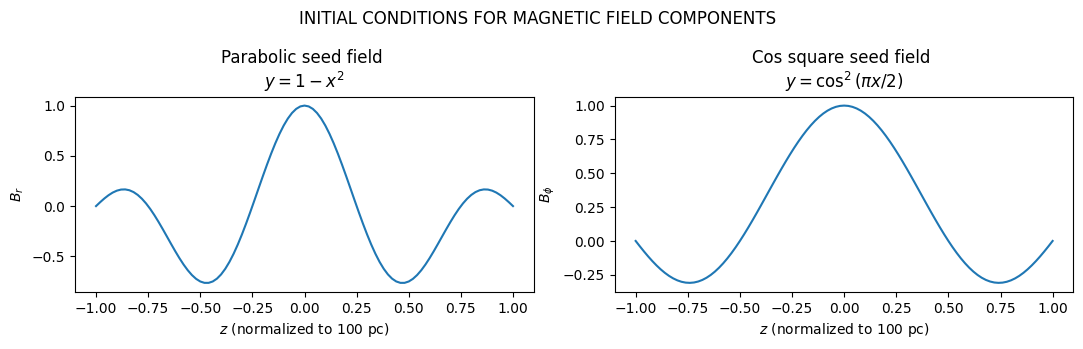

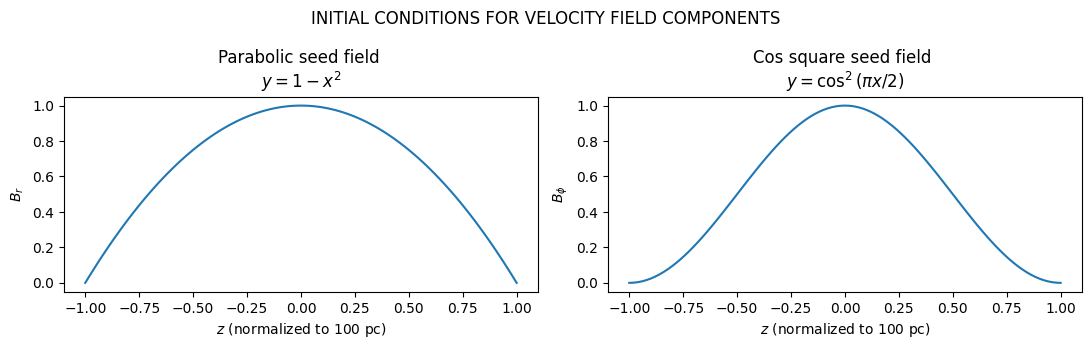

In [2]:
def init_cond_Br(x):
    return (1-x**2)*np.cos(2*np.pi*x)

def init_cond_Bphi(x):
    return (1-x**2)*np.cos(np.pi*x)

def source_term(x, t):
    return 0

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = \cos^2(\pi x/2)$'
global_title = 'INITIAL CONDITIONS FOR MAGNETIC FIELD COMPONENTS'

plot_init_cond(z, init_cond_Br, init_cond_Bphi, title_1, title_2, global_title)
plt.show()

#######################################################################

def init_cond_Vr(x):
    return 1-x**2

def init_cond_Vz(x):
    return np.cos(np.pi/2*x)**2

z = np.linspace(-1, 1, 101)
title_1 = r'Parabolic seed field '+'\n'+r'$ y = 1-x^2$'
title_2 = r'Cos square seed field '+'\n'+r'$ y = \cos^2(\pi x/2)$'
global_title = 'INITIAL CONDITIONS FOR VELOCITY FIELD COMPONENTS'

plot_init_cond(z, init_cond_Vr, init_cond_Vz, title_1, title_2, global_title)
plt.show()

In [3]:
def alpha_r(r):
    return 1

def Omega(r, r_0=1, Omega_0=1):
    return Omega_0/(1 + (r/r_0)**2)

def q(r, r_0=1, Omega_0=1):
    return -(r/r_0)**2 / (1 + (r/r_0)**2)

print(q(1))


-0.5


In [4]:
def matrix_A(N, a1, a2, a3, a4, b1, b2, b3, b4, c1, c2, c3, c4):
    # return a 2N x 2N matrix with the given terms in each block of the matrix
    A = np.zeros((2*N, 2*N))
    for i in range(N):
        A[i, i] = a1
        A[i, i+N] = a2
        A[i+N, i] = a3
        A[i+N, i+N] = a4
    for i in range(N-1):
        A[i, i+1] = b1
        A[i, i+N+1] = b2
        A[i+N, i+1] = b3
        A[i+N, i+N+1] = b4
        A[i+1, i] = c1
        A[i+1, i+N] = c2
        A[i+N+1, i] = c3
        A[i+N+1, i+N] = c4
    return A

def matrix_B(N, a1, a2, a3, a4, b1, b2, b3, b4, c1, c2, c3, c4):
    B = np.zeros((2*N, 2*N))
    for i in range(N):
        B[i, i] = a1
        B[i, i+N] = a2
        B[i+N, i] = a3
        B[i+N, i+N] = a4
    for i in range(N-1):
        B[i, i+1] = b1
        B[i, i+N+1] = b2
        B[i+N, i+1] = b3
        B[i+N, i+N+1] = b4
        B[i+1, i] = c1
        B[i+1, i+N] = c2
        B[i+N+1, i] = c3
        B[i+N+1, i+N] = c4
    return B

print(matrix_A(3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
# print(matrix_B(3, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))


[[ 1.  5.  0.  2.  6.  0.]
 [ 9.  1.  5. 10.  2.  6.]
 [ 0.  9.  1.  0. 10.  2.]
 [ 3.  7.  0.  4.  8.  0.]
 [11.  3.  7. 12.  4.  8.]
 [ 0. 11.  3.  0. 12.  4.]]


In [18]:
def crank_nicolson_mod(N_x, N_t, init_cond_Br, init_cond_Bphi, A, B):

    # Initialize temperature array
    U = np.zeros((2*N_x, N_t))

    # Initial condition
    for i in range(N_x):
        U[i, 0] = init_cond_Br[i]
        U[N_x+i, 0] = init_cond_Bphi[i]

    for j in range(1, N_t):
        U[:, j] = np.dot(np.linalg.inv(A), np.dot(B, U[:, j - 1]))

    return U


In [52]:
# Constants and parameters
eta_T = 3.48e-7    # magnetic diffusivity
alpha = 1e5     # alpha effect
Omega = 1e9
q = 1e3
t_max = 100     # total simulation time
z_min = -1.0     # minimum thickness of the disc
z_max = 1.0     # thickness of the disc
dt = t_max/200       # time step
dz = 0.01       # spatial step in z direction

# Spatial grid
z = np.linspace(z_min, z_max, int((z_max - z_min) / dz) + 1)
t = np.linspace(0, t_max, int(t_max / dt) + 1)

# Coefficients for the matrix A and B
rho = eta_T*dt/(2*dz**2)
sigma = alpha*dt/(2*dz)

A = matrix_A(len(z), 1+2*rho, -sigma, q*Omega*dt, 1+2*rho, -rho, sigma, 0, -rho, -rho, 0, 0, -rho)
B = matrix_B(len(z), 1-2*rho, sigma, 0, 1-2*rho, rho, -sigma, 0, rho, rho, 0, 0, rho)

def init_cond_Br(x):
    return (1-x**2)*np.cos(2*np.pi*x)

def init_cond_Bphi(x):
    return (1-x**2)*np.cos(np.pi*x)

# Solve the diffusion equation in radial direction
solution = crank_nicolson_mod(len(z), len(t), init_cond_Br(z), init_cond_Bphi(z), A, B)

B_r = solution[:len(z), :]
B_phi = solution[len(z):, :]
print(z.shape, t.shape)
print(B_r.shape, B_phi.shape)


(201,) (201,)
(201, 201) (201, 201)


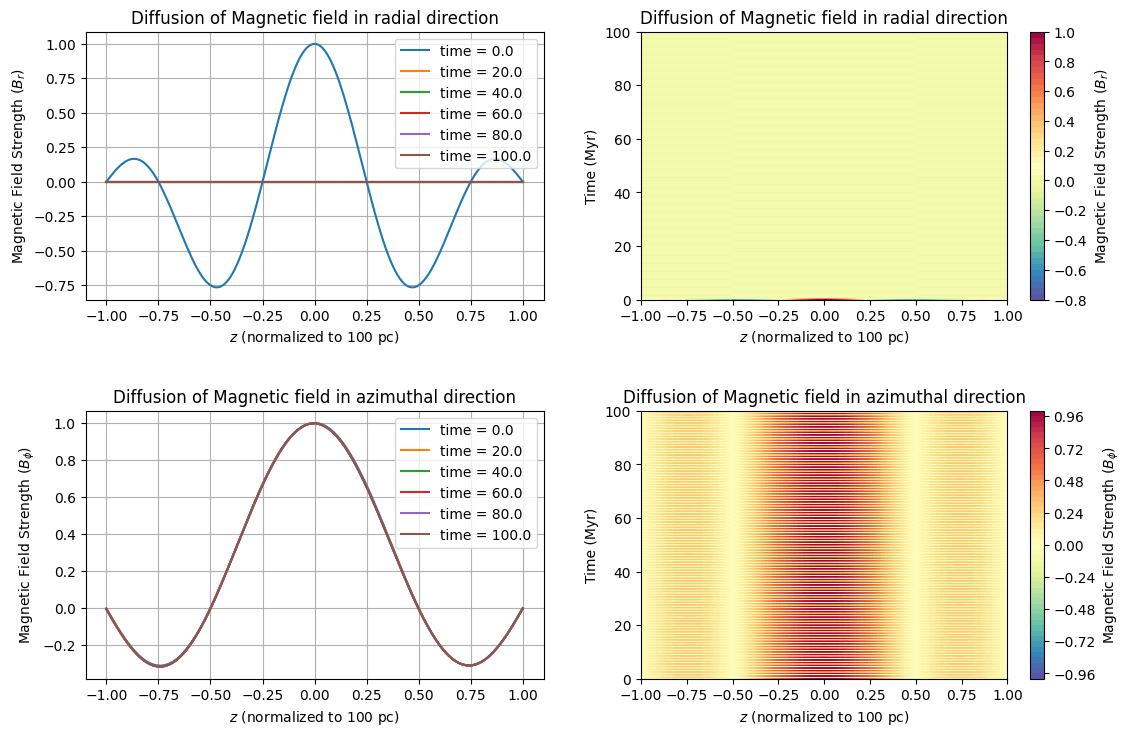

In [53]:
# Plot the solution in imshow
plot_diff(t, z, B_r, B_phi)
plt.show()